In [1]:
import os
import re
import sys
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to C:\Users\TSJ
[nltk_data]     Avenue\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\TSJ
[nltk_data]     Avenue\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\TSJ
[nltk_data]     Avenue\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
#Function Definations for data preprocessing 

#Declarations of stop words
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

#remove all the punctuation marks
def remove_punctuations(text):
    #get and print all the punctuation marks in the English language
    punctuations_list = string.punctuation
    
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
    
#remove stop words from a piece of text
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwordlist])

#remove repearting characters; nooooooo, yessss, etc
def remove_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

#remove all links in the tweets
def remove_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

#remove numbers from the tweets
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)

#lemmatize the tweets
def lemmatize_tweet(data):
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in data]
    return data

#if a link didn't start with 'www' but 'http(s) remove it'
def remove_https(text):
  partial_list = text.split(" ")
  ans = ""
  for ele in partial_list:
    if(ele.startswith("http")):
      pass
    else:
      ans+=ele+" "
  return ans

#remove hashtags from the tweets
def remove_hashtags(text):
  temp_list = text.split(" ")
  h_ans = ""
  for ele in temp_list:
    if(ele.startswith("#")):
      pass
    else:
      h_ans+=ele+" "
  return h_ans

  #remove username mentions from the tweets
def remove_mentions(text):
  temp_list = text.split(" ")
  h_ans = ""
  for ele in temp_list:
    if(ele.startswith("@")):
      pass
    else:
      h_ans+=ele+" "
  return h_ans

In [3]:
#Function Definations for data preprocessing 

#Declarations of stop words
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

#remove all the punctuation marks
def remove_punctuations(text):
    #get and print all the punctuation marks in the English language
    punctuations_list = string.punctuation
    
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
    
#remove stop words from a piece of text
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwordlist])

#remove repearting characters; nooooooo, yessss, etc
def remove_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

#remove all links in the tweets
def remove_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

#remove numbers from the tweets
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)

#lemmatize the tweets
def lemmatize_tweet(data):
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in data]
    return data

#if a link didn't start with 'www' but 'http(s) remove it'
def remove_https(text):
  partial_list = text.split(" ")
  ans = ""
  for ele in partial_list:
    if(ele.startswith("http")):
      pass
    else:
      ans+=ele+" "
  return ans

#remove hashtags from the tweets
def remove_hashtags(text):
  temp_list = text.split(" ")
  h_ans = ""
  for ele in temp_list:
    if(ele.startswith("#")):
      pass
    else:
      h_ans+=ele+" "
  return h_ans

  #remove username mentions from the tweets
def remove_mentions(text):
  temp_list = text.split(" ")
  h_ans = ""
  for ele in temp_list:
    if(ele.startswith("@")):
      pass
    else:
      h_ans+=ele+" "
  return h_ans

In [4]:
#read the csv file
originalBeforeData = pd.read_csv("elevy_tweets-AFTER.csv")
originalBeforeData.describe()

,Unnamed: 0
count,10000.00000
mean,4999.50000
std,2886.89568
min,0.00000
25%,2499.75000
50%,4999.50000
75%,7499.25000
max,9999.00000


In [5]:
originalBeforeData.head(4)

,Unnamed: 0,date,username,displayname,location,language,tweet
0,0,2022-12-04 23:24:54+00:00,ashawo6hrs,🇬🇭E_levy GH© ✋🇬🇭,Heaven,en,@headupagain How much
1,1,2022-12-04 22:45:09+00:00,ashawo6hrs,🇬🇭E_levy GH© ✋🇬🇭,Heaven,und,@kvng_baff @Kayjnr10 😂 💔
2,2,2022-12-04 22:25:47+00:00,UKnowIGotSoul,Howard E. Levy II,"Dallas, TX",en,I would have loved to have heard this discusse...
3,3,2022-12-04 21:51:29+00:00,ravid_e_levy,🇮🇹Ravid Levy🇮🇹,Tel Aviv,iw,"@EinhornOmer וואליד באדיר מוסר ד""ש"


In [6]:
#check tweet language
originalBeforeData['language'].value_counts()

en     5616
iw     2257
fr      729
pt      521
hu      215
und     142
tl       72
in       70
qme      64
es       63
ht       48
qam      46
it       41
fi       30
nl       16
qht      15
cs       12
da        8
no        6
ca        5
ro        5
et        4
zxx       4
pl        4
hi        3
art       2
ja        1
eu        1
Name: language, dtype: int64

In [7]:
#drop all tweets that are not in English
indexOfLang = originalBeforeData[(originalBeforeData['language'] != 'en')].index
originalBeforeData.drop(indexOfLang , inplace=True)

#recheck poster location
originalBeforeData['language'].value_counts()

en    5616
Name: language, dtype: int64

In [8]:
#check poster location
originalBeforeData['location'].value_counts()

Accra, Ghana                 783
Ghana                        475
Greater Accra, Ghana         239
Kumasi, Ghana                121
Accra                         74
                            ... 
Kofcity_ghana                  1
Earth 😀                        1
In Someone's heart.            1
Ghana Belongs To You n I       1
Enfield, London                1
Name: location, Length: 994, dtype: int64

In [9]:
#get the needed data, the TWEETS
analysisData = originalBeforeData[['date', 'tweet']]

In [10]:
#make all tweets lowercase
analysisData['processed'] = analysisData['tweet'].str.lower()
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_17428\2702797206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['tweet'].str.lower()


0                                 @headupagain how much
2     i would have loved to have heard this discusse...
12    @dolpheralph @e_levy_22 @ghanafaofficial learn...
13    @onuasmart i want to ask the government do you...
14    @onuasmart so for you taking your e levy and m...
Name: processed, dtype: object

In [11]:
analysisData['processed'] = analysisData['processed'].apply(lambda text: remove_stopwords(text))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_17428\4113344469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda text: remove_stopwords(text))


0                                     @headupagain much
2     would loved heard discussed @ironlordpodcast t...
12    @dolpheralph @e_levy_22 @ghanafaofficial learn...
13    @onuasmart want ask government finger print go...
14    @onuasmart taking e levy mtn charges not givin...
Name: processed, dtype: object

In [12]:
#Removing Link/Url From tweet
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_URLs(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_17428\3057260679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_URLs(tweet))


0                                     @headupagain much
2     would loved heard discussed @ironlordpodcast t...
12    @dolpheralph @e_levy_22 @ghanafaofficial learn...
13    @onuasmart want ask government finger print go...
14    @onuasmart taking e levy mtn charges not givin...
Name: processed, dtype: object

In [13]:
#Removing Hashtags From tweet
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_hashtags(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_17428\1445621100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_hashtags(tweet))


0                                    @headupagain much 
2     would loved heard discussed @ironlordpodcast t...
12    @dolpheralph @e_levy_22 @ghanafaofficial learn...
13    @onuasmart want ask government finger print go...
14    @onuasmart taking e levy mtn charges not givin...
Name: processed, dtype: object

In [14]:
#Removing user mentions From tweet
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_mentions(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_17428\3488703385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_mentions(tweet))


0                                                much  
2     would loved heard discussed today....we need b...
12                 learn not insult people don’t know  
13    want ask government finger print go foe ghana ...
14    taking e levy mtn charges not giving money wan...
Name: processed, dtype: object

In [15]:
#Removing Punctuations From tweet
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_punctuations(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_17428\4108601039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_punctuations(tweet))


0                                                much  
2     would loved heard discussed todaywe need buck ...
12                 learn not insult people don’t know  
13    want ask government finger print go foe ghana ...
14    taking e levy mtn charges not giving money wan...
Name: processed, dtype: object

In [16]:
#Removing Duplicate Characters From tweet
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_repeating_char(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_17428\1192953367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_repeating_char(tweet))


0                                                much  
2     would loved heard discussed todaywe need buck ...
12                 learn not insult people don’t know  
13    want ask government finger print go foe ghana ...
14    taking e levy mtn charges not giving money wan...
Name: processed, dtype: object

In [17]:
#Removing Numeric numbers from the tweets
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_numbers(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_17428\771441043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_numbers(tweet))


0                                                much  
2     would loved heard discussed todaywe need buck ...
12                 learn not insult people don’t know  
13    want ask government finger print go foe ghana ...
14    taking e levy mtn charges not giving money wan...
Name: processed, dtype: object

In [18]:
#Removing https
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_https(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_17428\729992514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_https(tweet))


0                                               much   
2     would loved heard discussed todaywe need buck ...
12                learn not insult people don’t know   
13    want ask government finger print go foe ghana ...
14    taking e levy mtn charges not giving money wan...
Name: processed, dtype: object

In [19]:
#Perform lemmatization
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: lemmatize_tweet(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_17428\318354429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: lemmatize_tweet(tweet))


0                                               much   
2     would loved heard discussed todaywe need buck ...
12                learn not insult people don’t know   
13    want ask government finger print go foe ghana ...
14    taking e levy mtn charges not giving money wan...
Name: processed, dtype: object

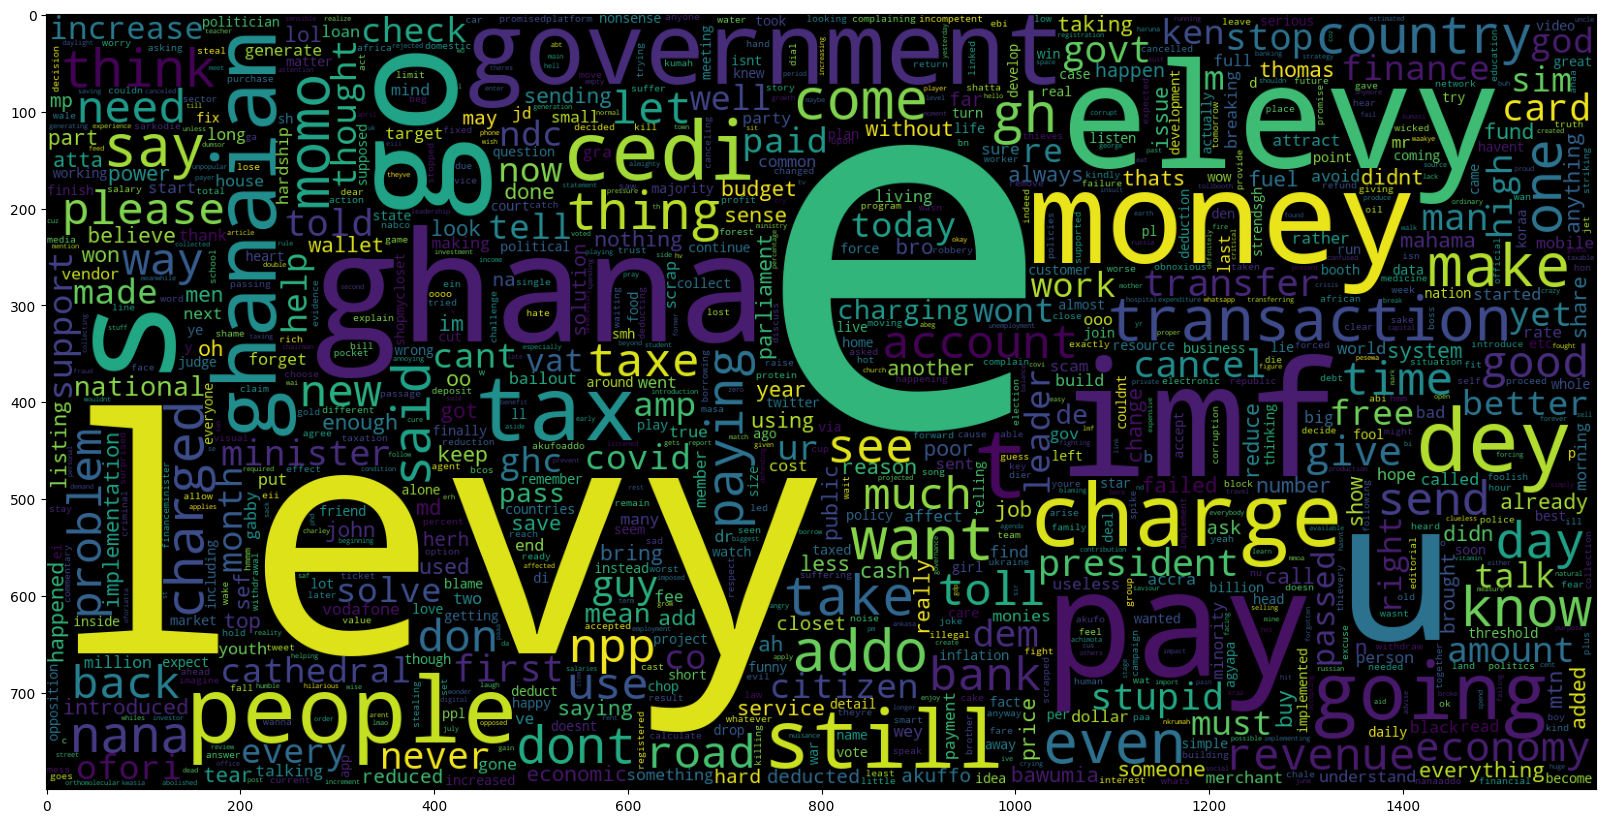

In [20]:
#create the wordcloud
data_pos = analysisData['processed']
wordCloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wordCloud)

In [21]:
#get percentage representation
def percentage(part):
 return 100 * float(part)/float(analysisData['tweet'].count())

In [22]:
#calculate polarity scores
sentiments = SentimentIntensityAnalyzer()

#for each tweet in the column, calculate its polarity score and assign that value to a new column
analysisData["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in analysisData["tweet"]]
analysisData["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in analysisData["tweet"]]
analysisData["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in analysisData["tweet"]]

data = analysisData[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_17428\1559797729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in analysisData["tweet"]]
C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_17428\1559797729.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in analysisData["tweet"]]


                                                tweet  Positive  Negative  \
0                               @headupagain How much     0.000     0.000   
2   I would have loved to have heard this discusse...     0.189     0.000   
12  @DolpheRalph @e_levy_22 @ghanafaofficial Learn...     0.213     0.000   
13  @OnuaSmart I want to ask the government do you...     0.058     0.156   
14  @OnuaSmart so for you taking your e levy and m...     0.132     0.068   

    Neutral  
0     1.000  
2     0.811  
12    0.787  
13    0.787  
14    0.800  


C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_17428\1559797729.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in analysisData["tweet"]]


In [23]:
#Calculate the sum of all polarities
positive = sum(data["Positive"])
negative = sum(data["Negative"])
neutral = sum(data["Neutral"])

#what is the most frequent label assigned to the tweets according to the sentiment scores?
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊")
    elif (b>a) and (b>c):
        print("Negative 😠")
    else:
        print("Neutral 🙂")

sentiment_score(positive, negative, neutral)

Neutral 🙂


In [24]:
#So the most of the tweets are neutral, which means they are neither positive nor negative.
#Now let’s have a look at the total of the sentiment scores:
print("Positive: ", positive)
print("Negative: ", negative)
print("Neutral: ", neutral)

Positive:  391.3810000000002
Negative:  501.7569999999998
Neutral:  4722.876999999978


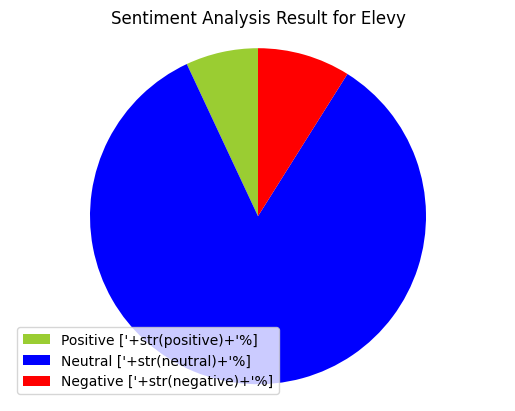

In [25]:
#Creating PieCart
labels = ["Positive ['+str(positive)+'%]", "Neutral ['+str(neutral)+'%]", "Negative ['+str(negative)+'%]"]
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)

plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for Elevy")
plt.axis('equal')
plt.show()